# Feature correlation

Correlation between main weapon used and various "features" of the round on different maps

In [3]:
import datetime

from s2_analytics.test_summary_collector import SummaryCollector
import sqlite3

import seaborn as sns

from s2_analytics.collector.sqlite_collector import SqliteCollector
from s2_analytics.constants import WEAPONS_PRIMARY, WEAPONS_SECONDARY, WEAPON_MODS_DATES
from s2_analytics.importer import import_games
from s2_analytics.main_weapon_analyzer import MainWeaponRoundTagger
from s2_analytics.team_round_tag_correlation_analyzer import TeamRoundTagCorrelationAnalyzer

conn = sqlite3.connect("file::memory:")
sqlite_collector = SqliteCollector(sqlite_conn=conn).init()
summary_collector = SummaryCollector(conn, sqlite_collector)
tag_correlation_analyzer = TeamRoundTagCorrelationAnalyzer(conn, sqlite_collector, [MainWeaponRoundTagger([WEAPONS_PRIMARY, WEAPONS_SECONDARY])]).init()
import_games(
    "logs_ranked/",
    start_date=WEAPON_MODS_DATES[0],
    processors=[tag_correlation_analyzer, sqlite_collector],
    game_filters=[
        lambda g: g.playlist_code == "CTF-Standard-6"
    ]
)
pass

## Data summary

In [4]:
import tabulate

summary = summary_collector.get_summary().to_table()
tabulate.tabulate(summary, tablefmt='html')

First game,2022-12-28
Last game,2023-02-02
Games total,467
Rounds total,1195
Games in playlist `CTF-Standard-6`,467


## Feature correlation

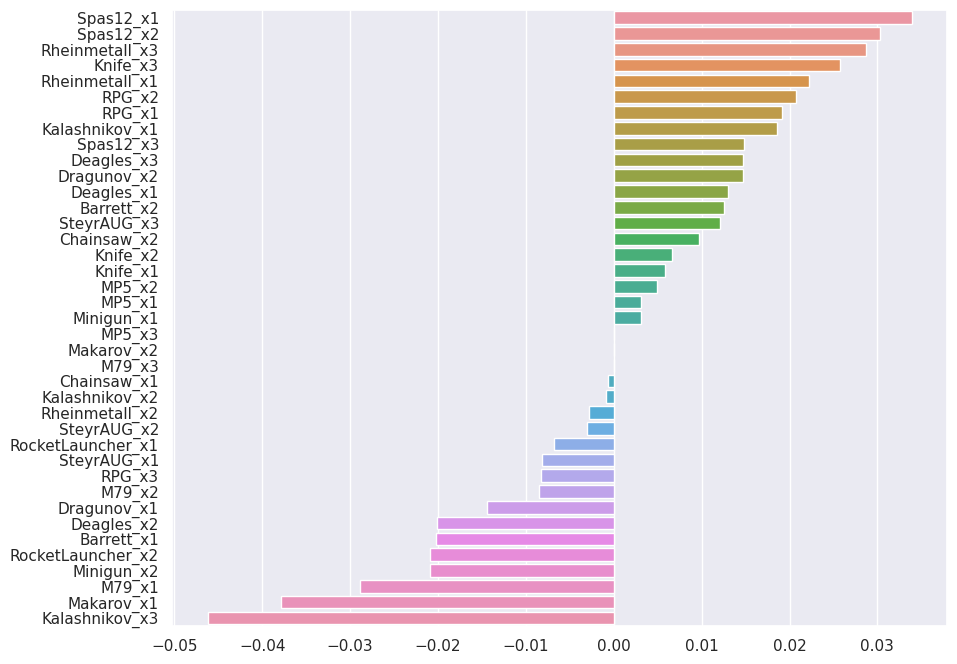

In [3]:
keys = []
values = []
correlation = tag_correlation_analyzer.calculate_win_correlation()
for key, value in sorted(correlation.items(), key=lambda a: a[1], reverse=True):
    keys.append(key)
    values.append(value)

sns.set(rc={'figure.figsize': (10, 8)})
sns.barplot(x=values, y=keys)
pass